#Import Pustaka

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/EmotionDataset/eye.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Loading

In [ ]:
train = '/content/files/dataset/train/'
test = '/content/files/dataset/test/'

#EDA

In [ ]:
for expression in os.listdir(train):
    print(str(len(os.listdir(train + expression))) + " " + expression + " images")

1760 Closed_Eyes images
1640 Open_Eyes images


In [ ]:
for expression in os.listdir(test):
    print(str(len(os.listdir(test + expression))) + " " + expression + " images")

240 Closed_Eyes images
360 Open_Eyes images


s0014_08332_0_0_1_1_1_02.png
s0036_03334_1_0_1_0_0_01.png
s0036_02598_1_0_1_0_0_01.png
s0001_02989_0_1_1_2_0_01.png
s0014_07923_0_0_1_1_0_02.png
s0006_00133_0_1_0_0_0_01.png
s0016_00941_1_0_0_0_1_01.png
s0014_00087_0_0_0_0_0_01.png
s0013_01948_0_1_0_0_0_01.png
s0016_01275_1_0_0_2_1_01.png


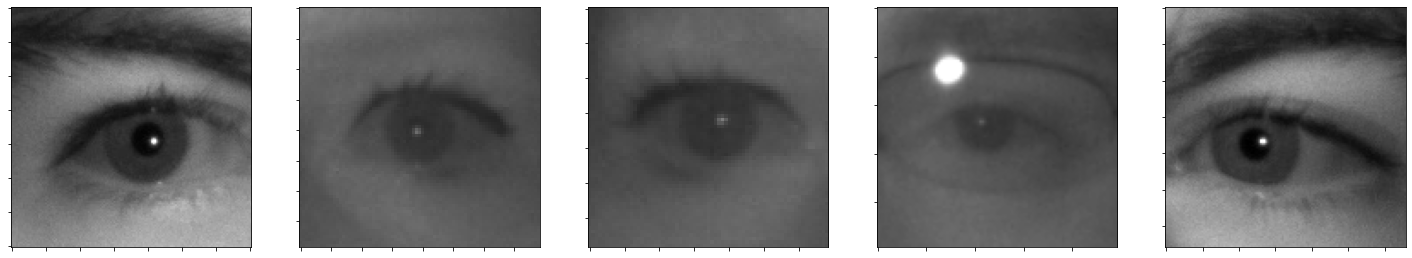

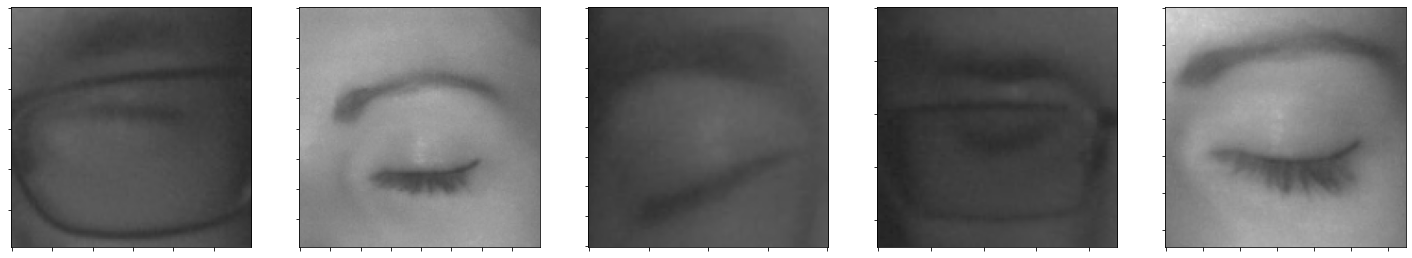

In [ ]:
def plot_examples(folder_names, selected_folder, train):    
    
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    file_names = os.listdir(train + '/' + selected_folder)
    for i in range(5):
        print(file_names[i])
        img = cv2.imread(train + '/' + selected_folder + '/' + file_names[i])
        axs[i].imshow(img)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
plot_examples(os.listdir(train),'Open_Eyes', train)
plot_examples(os.listdir(train),'Closed_Eyes', train)


#Data Preprocessing

In [ ]:
# preprocess data
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                   horizontal_flip=True,
                                   validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1/255.0,horizontal_flip=True)

train_data = train_datagen.flow_from_directory(train,
                                               batch_size=16,
                                               target_size=(128, 128),
                                               color_mode='grayscale',
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset="training")
valid_data = train_datagen.flow_from_directory(train,
                                               batch_size=16,
                                               target_size=(128, 128),
                                               color_mode='grayscale',
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset="validation")

test_data =   test_datagen.flow_from_directory(test,
                                               batch_size=16,
                                               target_size=(128, 128),
                                               color_mode='grayscale',
                                               class_mode='categorical',
                                               shuffle=False)

Found 3060 images belonging to 2 classes.
Found 340 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


#Model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Initialising the Model
model = Sequential()

# 1 - Convolution
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPool2D(2))

# 2nd Convolution layer
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D(2))

# 3rd Convolution layer
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPool2D(2))


# 4th Convolution layer
model.add(Conv2D(128, 3,padding='same', activation='relu'))
model.add(MaxPool2D(2))

# Flattening
model.add(Flatten())


# Fully connected layer 
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='softmax'))

# model compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [ ]:
#EarlyStop=EarlyStopping(patience=3,restore_best_weights=True)
#Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
#callback=[EarlyStop , Reduce_LR]

In [ ]:
history = model.fit(train_data,
                    epochs=4,
                    validation_data=valid_data)

Epoch 1/4
192/192 [==============================] - 13s 21ms/step - loss: 0.2529 - accuracy: 0.8745 - val_loss: 0.3083 - val_accuracy: 0.9265
Epoch 2/4
192/192 [==============================] - 4s 18ms/step - loss: 0.0449 - accuracy: 0.9824 - val_loss: 0.3824 - val_accuracy: 0.9324
Epoch 3/4
192/192 [==============================] - 3s 18ms/step - loss: 0.0310 - accuracy: 0.9931 - val_loss: 0.8183 - val_accuracy: 0.8529
Epoch 4/4
192/192 [==============================] - 3s 18ms/step - loss: 0.0207 - accuracy: 0.9928 - val_loss: 0.7806 - val_accuracy: 0.9059


In [ ]:
res = model.predict(test_data)
y_test = test_data.classes
res = res.argmax(axis=1)
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       240
           1       1.00      0.99      0.99       360

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



In [ ]:
model.save('model_mata.h5')

In [ ]:
model_json = model.to_json()
with open('model_mata.json', "w") as json_file:
    json_file.write(model_json)

In [ ]:
model_try = keras.models.load_model('model_mata.h5')

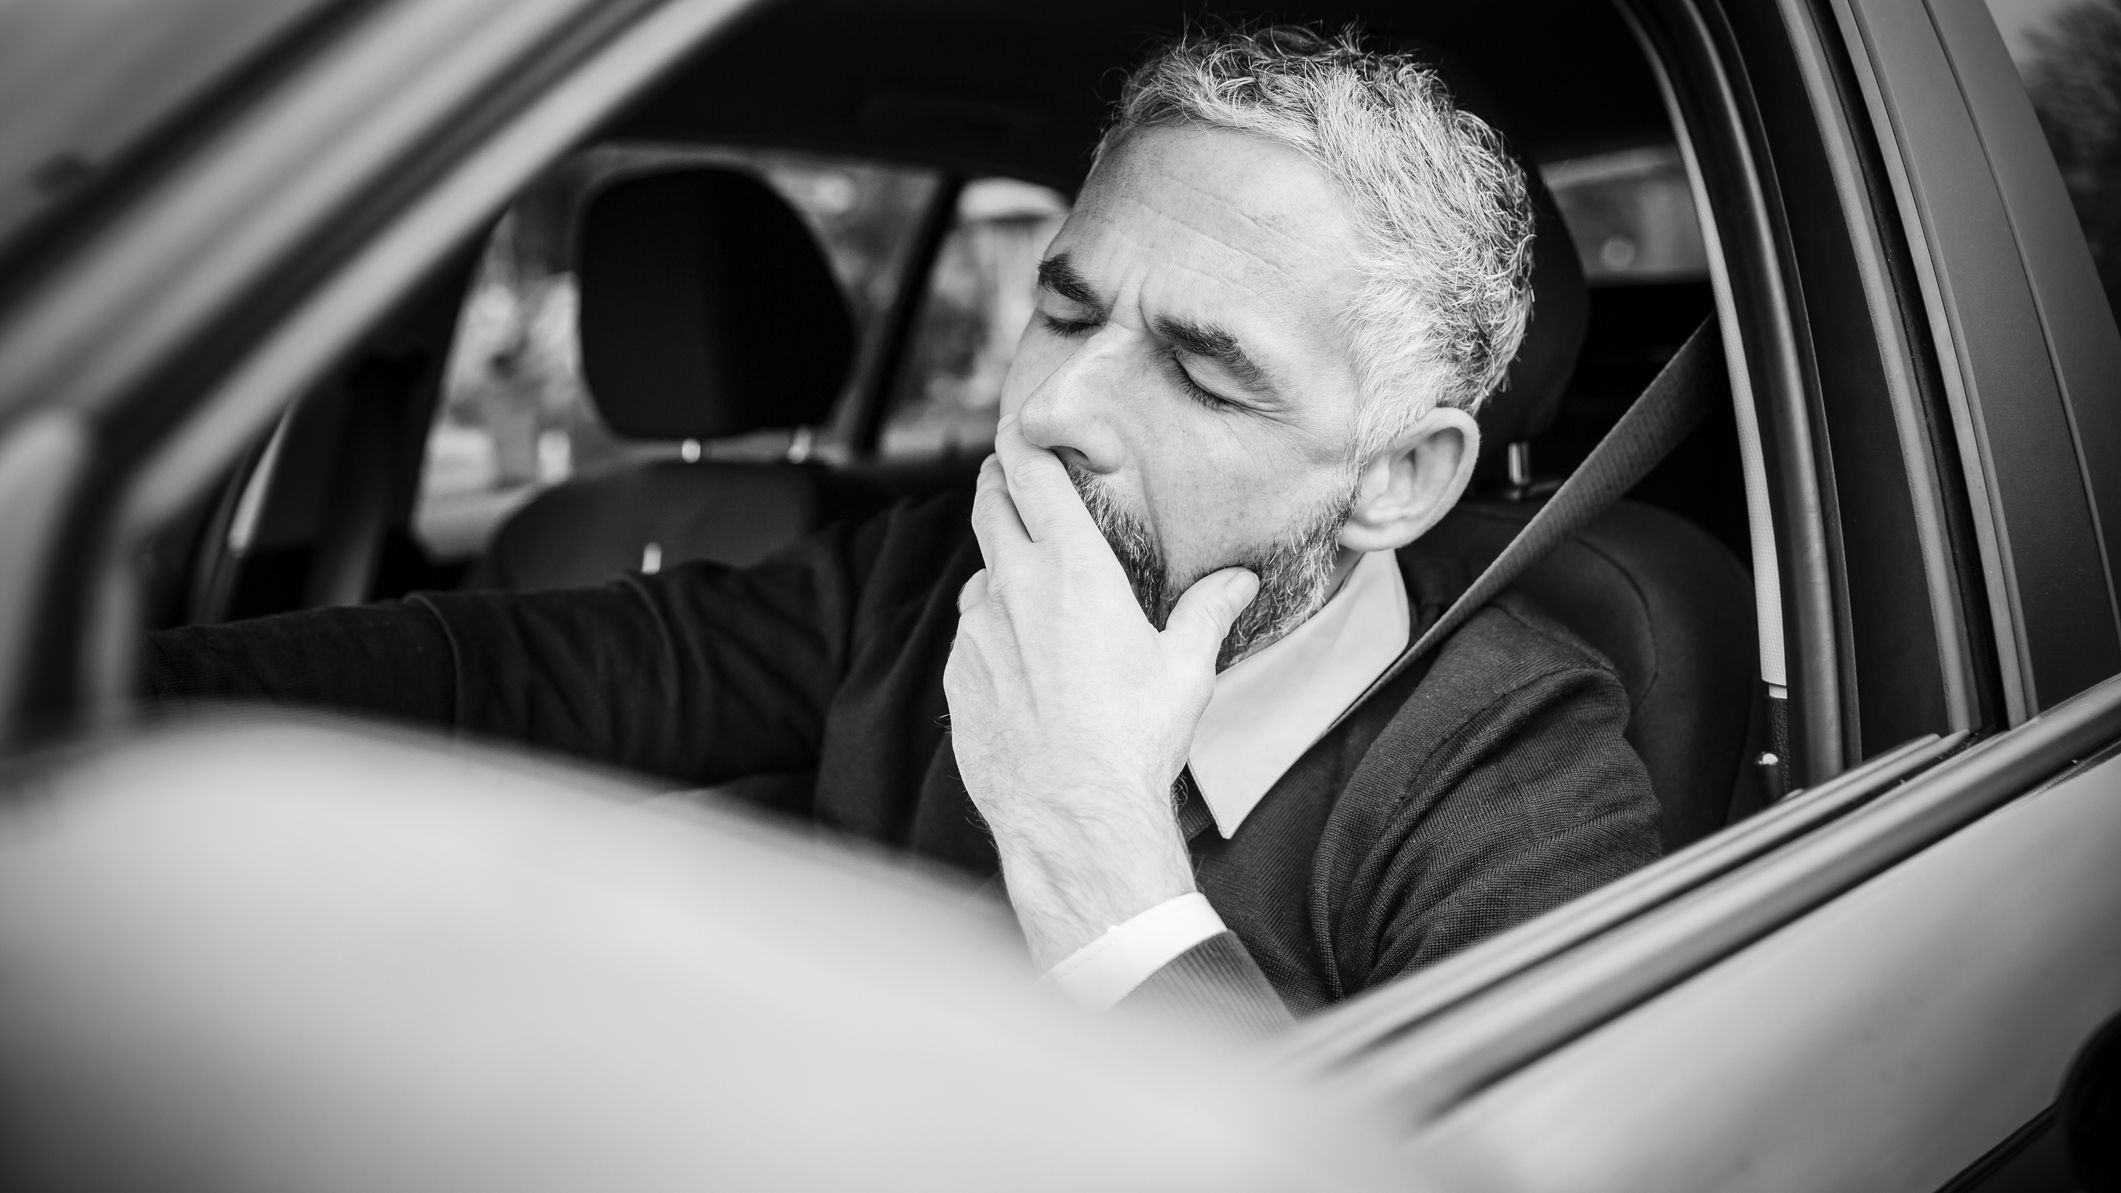

In [ ]:
image = cv2.imread('/content/GettyImages-556453489-ef64e611a1844c10852fdc098ade4897.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

In [ ]:
roi = cv2.resize(img_gray, (128,128))
roi = roi / 255
roi = np.expand_dims(roi, axis = 0)
probs = model_try.predict(roi)
print(probs)

forecasts = np.argmax(probs)
if forecasts == 0:
  print('Ngantuk')
else :
  print('Tidak')

[[1.000000e+00 9.239418e-14]]
Ngantuk
